Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.4  
Zadnji put ažurirano: 22. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **2. studenog 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [3]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [4]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

[1 1 1 1 0 0 0]
1.0


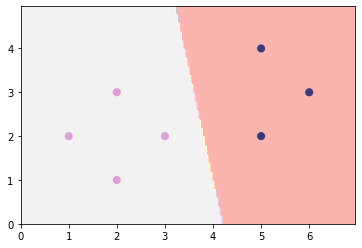

In [5]:
# Vaš kôd ovdje

ridge_classifier = RidgeClassifier(alpha=0)
ridge_classifier.fit(seven_X, seven_y)
predicted_rc = ridge_classifier.predict(seven_X)

print(predicted_rc)

print(accuracy_score(seven_y, predicted_rc))

plot_2d_clf_problem(seven_X, seven_y, ridge_classifier.predict)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

[ 1.   0.9  1.2  0.7  0.2  0.1 -0.1]
[1, 1, 1, 1, 0, 0, 0]


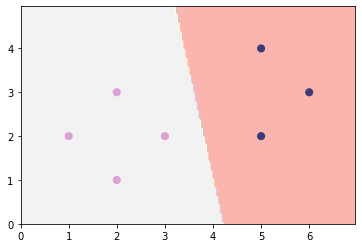

In [6]:
# Vaš kôd ovdje
linear_regression = LinearRegression()
linear_regression.fit(seven_X, seven_y)
predicted_lr = linear_regression.predict(seven_X)

print(predicted_lr)

y_classified = []

for x in predicted_lr:
    if x >= 0.5:
        y_classified.append(1)
    else:
        y_classified.append(0)
        
print(y_classified)
plot_2d_clf_problem(seven_X, y_classified, lambda x : linear_regression.predict(x) >= 0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [7]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

0.875


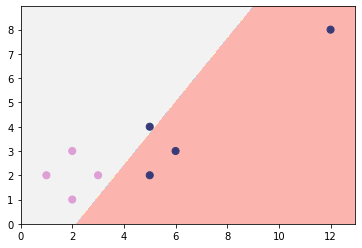

In [8]:
# Vaš kôd ovdje
ridge_classifier = RidgeClassifier(alpha=0)
ridge_classifier.fit(outlier_X, outlier_y)
predicted_rc = ridge_classifier.predict(outlier_X)

print(accuracy_score(outlier_y, predicted_rc))

plot_2d_clf_problem(outlier_X, outlier_y, lambda x : ridge_classifier.predict(x) >= 0.5)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [9]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

0.875


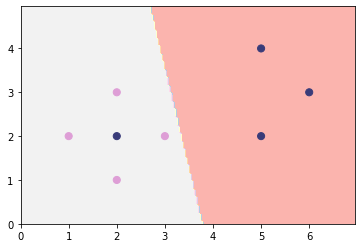

In [10]:
# Vaš kôd ovdje
ridge_classifier = RidgeClassifier()
ridge_classifier.fit(unsep_X, unsep_y)
predicted_rc = ridge_classifier.predict(unsep_X)

print(accuracy_score(unsep_y, predicted_rc))
plot_2d_clf_problem(unsep_X, unsep_y, lambda x : ridge_classifier.predict(x) >= 0.5)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

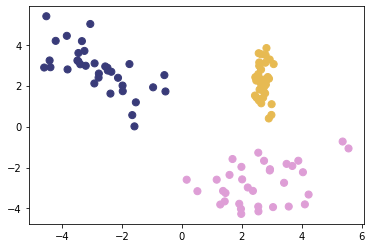

In [11]:
from sklearn.datasets import make_classification
# Vaš kôd ovdje

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=3,
                           n_clusters_per_class=1, class_sep=2.7, random_state=0)

plot_2d_clf_problem(X, y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

[0 1 1 1 2 2 1 0 2 2 0 1 2 1 2 0 0 1 2 1 2 0 1 2 1 0 2 2 2 0 2 1 1 0 1 0 0
 2 1 0 0 1 0 2 0 2 1 0 2 0 2 2 2 1 0 1 1 0 2 0 2 0 0 2 1 1 0 1 1 2 1 0 1 2
 2 0 0 1 1 0 2 1 2 1 0 2 1 1 1 1 0 0 1 0 2 1 0 2 0 0]
[0 1 1 1 2 2 1 0 2 2 0 1 2 1 2 0 0 1 2 1 2 0 1 2 1 0 2 2 2 0 2 1 1 0 1 0 0
 2 1 0 0 1 0 2 0 2 1 0 2 0 2 2 2 1 0 1 1 0 2 0 2 0 0 2 1 1 0 1 1 2 1 0 1 2
 2 0 0 1 1 0 2 1 2 1 0 2 1 1 1 1 0 0 1 0 2 1 0 2 0 0]


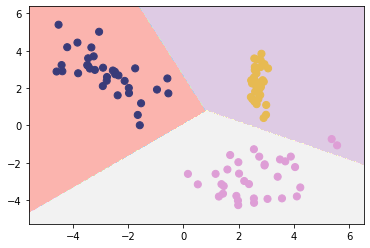

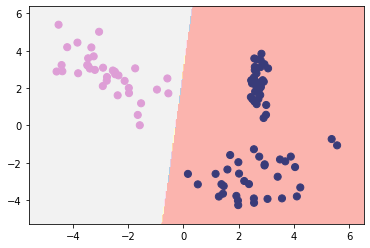

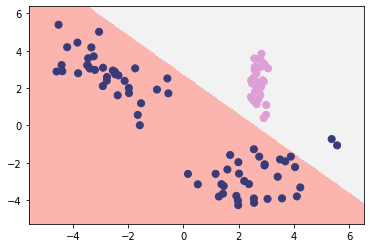

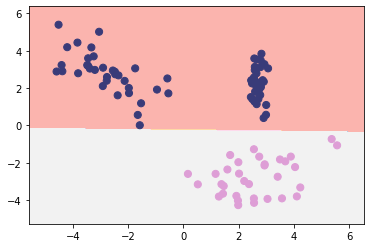

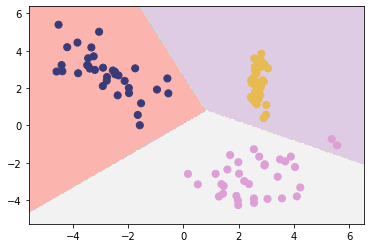

In [12]:
# Vaš kôd ovdje

y1 = [1 if yi == 0 else 0 for yi in y]
y2 = [1 if yi == 1 else 0 for yi in y]
y3 = [1 if yi == 2 else 0 for yi in y]

h1 = LinearRegression().fit(X, y1)
h2 = LinearRegression().fit(X, y2)
h3 = LinearRegression().fit(X, y3)

def predict(h1, h2, h3, X):
    prediction_indices = []
    
    zipper = zip(h1.predict(X), h2.predict(X), h3.predict(X))
    
    predictions = list(zipper)
    
    for prediction in predictions:
        h1, h2, h3 = prediction
        
        max_hypothesis = max(h1, h2, h3)
        
        if max_hypothesis == h1:
            prediction_indices.append(0)
        elif max_hypothesis == h2:
            prediction_indices.append(1)
        else: 
            prediction_indices.append(2)
        
    return np.array(prediction_indices)

clf = RidgeClassifier().fit(X, y)
predict_clf = clf.predict(X)

print(predict(h1, h2, h3, X))
print(predict_clf)

plt.figure()
plot_2d_clf_problem(X, y, lambda x: predict(h1, h2, h3, x))

plt.figure()
plot_2d_clf_problem(X, y1, lambda x : h1.predict(x) >= 0.5)

plt.figure()
plot_2d_clf_problem(X, y2, lambda x : h2.predict(x) >= 0.5)

plt.figure()
plot_2d_clf_problem(X, y3, lambda x : h3.predict(x) >= 0.5)

plt.figure()
plot_2d_clf_problem(X, y, clf.predict)

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

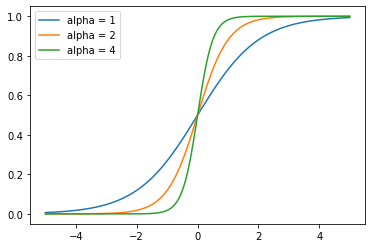

In [13]:
# Vaš kôd ovdje
def sigm(x, alpha=0):
  return 1 / (1 + np.exp(-alpha * x))

x = np.linspace(-5, 5, 500)
sigmoid = [0 for i in range(20)]
for alpha in [1, 2, 4]:
    sigmoid = sigm(alpha, x)
    plot(x, sigmoid, label = "alpha = " + str(alpha))
    
legend()
show()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from numpy import linalg

def lr_h(x, w):
    return 1/(1 + exp(-w.dot(x)))


def cross_entropy_error(X, y, w):
    Phi = PolynomialFeatures(1).fit_transform(X)
    N, feature_num = X.shape
    E = 0
    
    for i in range(N):
        E += -y[i] * np.log(lr_h(Phi[i], w)) - (1 - y[i]) * np.log(1 - lr_h(Phi[i], w))
        
    return E / N

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    Phi = PolynomialFeatures(1).fit_transform(X)
    N, feature_num = Phi.shape
    w = zeros(feature_num)
    w_trace = []
    w_trace.append(list(w))
    error = 0
    for j in range(max_iter):
        dw0 = 0.0
        dw = zeros(feature_num)
        next_error = 0
        
        for i in range(N):
            h = lr_h(Phi[i], w)
            dw -= (h - y[i]) * Phi[i]
        
        next_error = cross_entropy_error(X, y, w) 
        if(i != 0):
            if(abs(error - next_error) < epsilon):
                break
        error = next_error
        
        w = w * (1 - eta * alpha) + eta * dw
        w_trace.append(list(w))

        
    
    if trace:
        return w, w_trace
    else:
        return w

def lr_predict(X, w):
    phi = PolynomialFeatures(degree = 1).fit_transform(X)
    prediction = []
    
    for x in phi:
        if lr_h(x, w) >= 0.5:
            prediction.append(1)
        else:
            prediction.append(0)
        
    return np.array(prediction)


### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

0.13521872720206748
[ 4.45449454 -1.71089242  0.68413507]


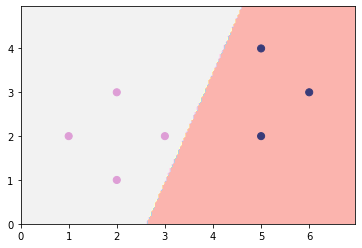

In [15]:
# Vaš kôd ovdje
#my_trained = lr_train(seven_X, seven_y, trace=True)
transformed_seven_X = PolynomialFeatures(1).fit_transform(seven_X)
weights = lr_train(seven_X, seven_y, trace=False)
print(cross_entropy_error(seven_X, seven_y, weights))
print(weights)

plt.figure()
plot_2d_clf_problem(seven_X, seven_y, lambda x: lr_predict(x, weights) >= 0.5)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [16]:
from sklearn.metrics import zero_one_loss

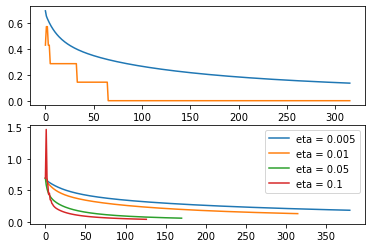

In [17]:
etas = [0.005, 0.01, 0.05, 0.1]
[wd, wd_trace] = lr_train(seven_X, seven_y, trace=True)

#h3d = lambda x: lr_predict(x, weights) >= 0.5
#print(h3d(seven_X))

error_cross = []
error_class = []
error_eta = []

for k in range(0, len(wd_trace), 3):
    h3d = lambda x: lr_predict(x, np.array(wd_trace[k]))
    error_cross.append(cross_entropy_error(seven_X, seven_y, np.array(wd_trace[k])))
    error_class.append(zero_one_loss(seven_y, h3d(seven_X)))
#print(error_cross)
#print(error_class)

for eta in etas:
    error = []
    [weta, weta_trace] = lr_train(seven_X, seven_y, eta=eta, trace=True)
    
    for j in range(0, len(weta_trace), 3):
        error.append(cross_entropy_error(seven_X, seven_y, np.array(weta_trace[j])))
        
    error_eta.append(error)
#print(error_eta)

subplot(2,1,1)
plot(error_cross)
plot(error_class);

subplot(2,1,2)
for index in range(0, len(etas)):
    plot(error_eta[index], label = 'eta = ' + str(etas[index]))
plt.legend()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

In [18]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(seven_X, seven_y)
prediction = logistic_regression.predict(seven_X)

print(prediction)
print(lr_predict(seven_X, weights))

#print(logistic_regression.intercept_, logistic_regression.coef_)
#print(weights)
# Vaš kôd ovdje

[1 1 1 1 0 0 0]
[1 1 1 1 0 0 0]


### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

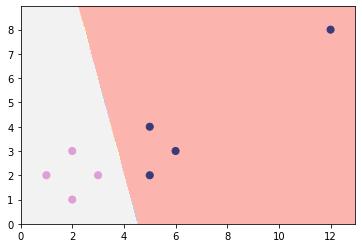

In [19]:
# Vaš kôd ovdje

log_reg = LogisticRegression()
log_reg.fit(outlier_X, outlier_y)

plot_2d_clf_problem(X=outlier_X, y=outlier_y, h = lambda x: log_reg.predict(x) >= 0.5)

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

[0.0, 0.0, 0.0]
[0.005, -0.04, -0.005]
[0.012517233136122513, -0.06914040580430024, -0.003247935809512448]


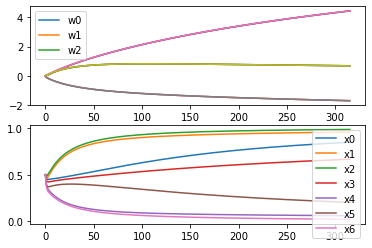

In [20]:
# Vaš kôd ovdje

w4, w4_trace = lr_train(seven_X, seven_y, trace=True)

w0_list = []
w1_list = []
w2_list = []

output_list = []

transformed_seven_X = PolynomialFeatures(1).fit_transform(seven_X)

for index in range(0, len(w4_trace), 3):
    w0_list.append(w4_trace[index])
    w1_list.append(w4_trace[index+1])
    w2_list.append(w4_trace[index+2])
    
print(w0_list[0])
print(w1_list[0])
print(w2_list[0])

for seven in range(0, len(transformed_seven_X)):
    output = []
    
    for trace in range(0, len(w4_trace), 3):
        output.append(lr_h(transformed_seven_X[seven], np.array(w4_trace[trace])))
    output_list.append(output)

    
subplot(2, 1, 1)
plot(w0_list)
plot(w1_list)
plot(w2_list)
legend(['w0', 'w1', 'w2']);

subplot(2, 1, 2)
for i in range(0, len(output_list)):
    plot(output_list[i], label = 'x' + str(i))
    
legend()
    


### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

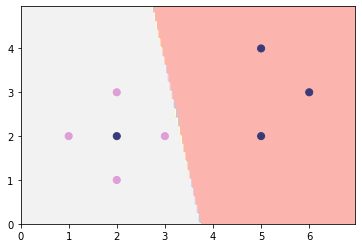

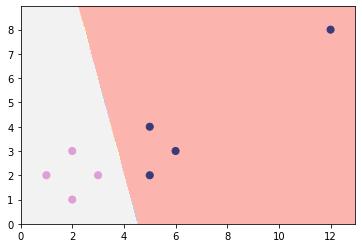

In [21]:
# Vaš kôd ovdje

lr_sep = LinearRegression().fit(unsep_X, unsep_y)
sep_pred = lr_sep.predict(unsep_X)

plot_2d_clf_problem(X=unsep_X, y=unsep_y, h = lambda x: lr_sep.predict(x) >= 0.5)
figure()
plot_2d_clf_problem(X=outlier_X, y=outlier_y, h = lambda x: log_reg.predict(x) >= 0.5)

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [22]:
from numpy.linalg import norm

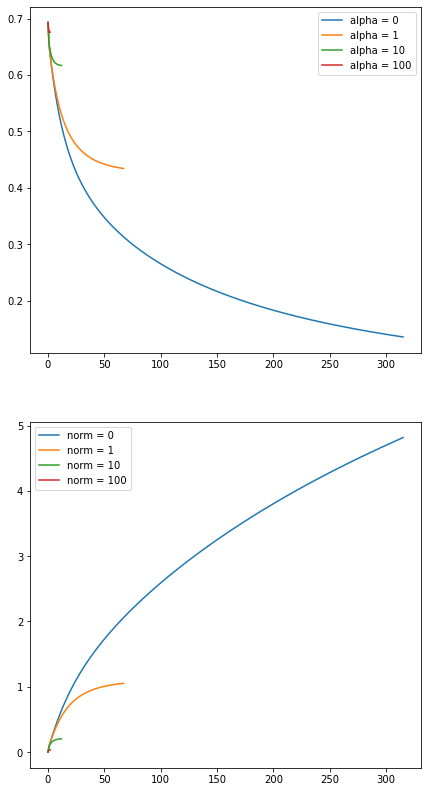

In [23]:
# Vaš kôd ovdje
alphas = [0, 1, 10, 100]
cross_error = []
norm_error = []
for alpha in alphas:
    w_regularised, w_trace_regularised = lr_train(seven_X, seven_y, alpha=alpha, trace=True)
    cross = []
    l2 = []
    for index in range(0, len(w_trace_regularised), 3):
        cross.append(cross_entropy_error(seven_X, seven_y, np.array(w_trace_regularised[index])))
        l2.append(norm(np.array(w_trace_regularised[index])))
        
    cross_error.append(cross)
    norm_error.append(l2)
    
figure(figsize(7, 14))
subplot(2, 1, 1)
for i in range(0, len(cross_error)):
    plot(cross_error[i], label = "alpha = " + str(alphas[i]))
legend(loc = 'best')

subplot(2, 1, 2)
for i in range(0, len(norm_error)):
    plot(norm_error[i], label = "norm = " + str(alphas[i]))
legend(loc = 'best')

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [24]:
from sklearn.preprocessing import PolynomialFeatures

#plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

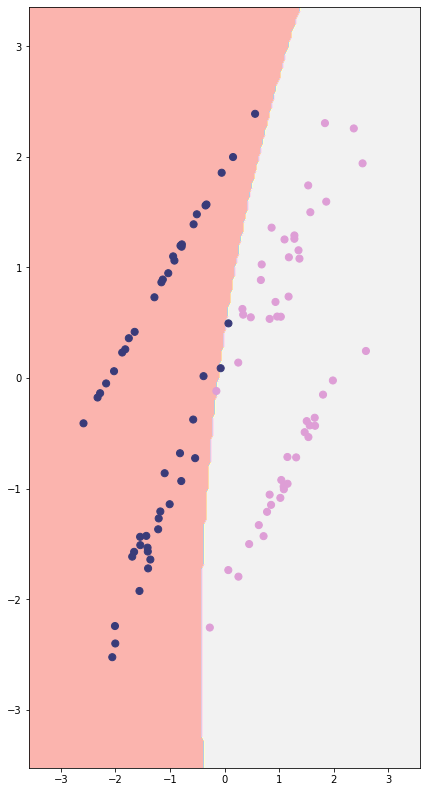

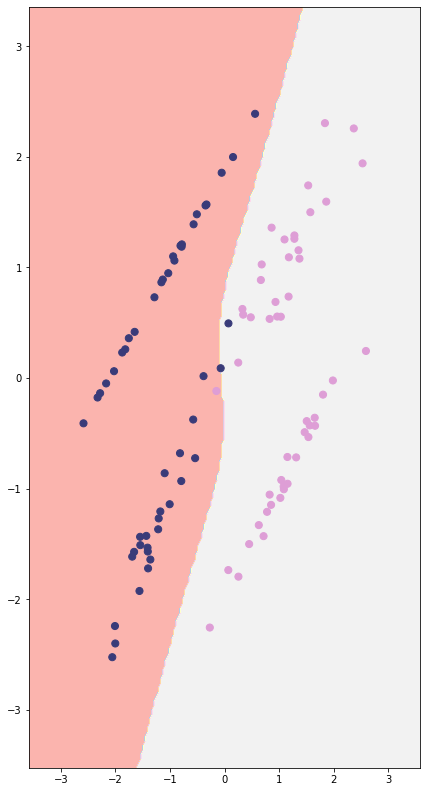

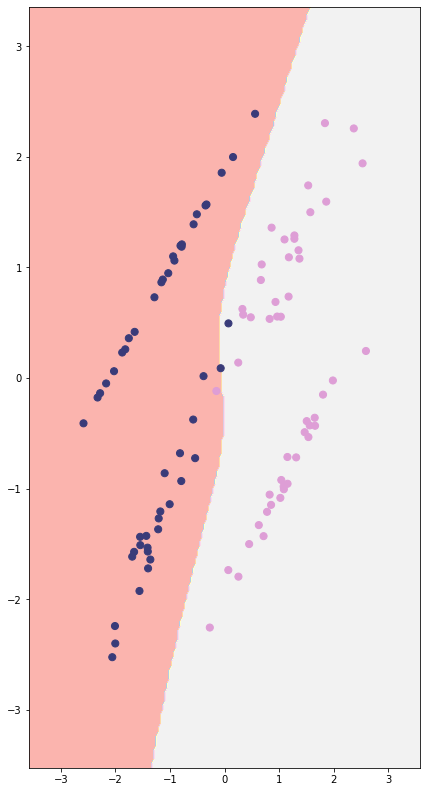

In [25]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2,
                           n_clusters_per_class=2, random_state=42)

# plot_2d_clf_problem(X, y)
    
for d in [2, 3, 4]:
    poly = PolynomialFeatures(d).fit(X)
    model = LogisticRegression().fit(poly.transform(X), y)
    h = lambda x : model.predict(poly.transform(x))
    plot_2d_clf_problem(X, y, h)
    show()



**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?